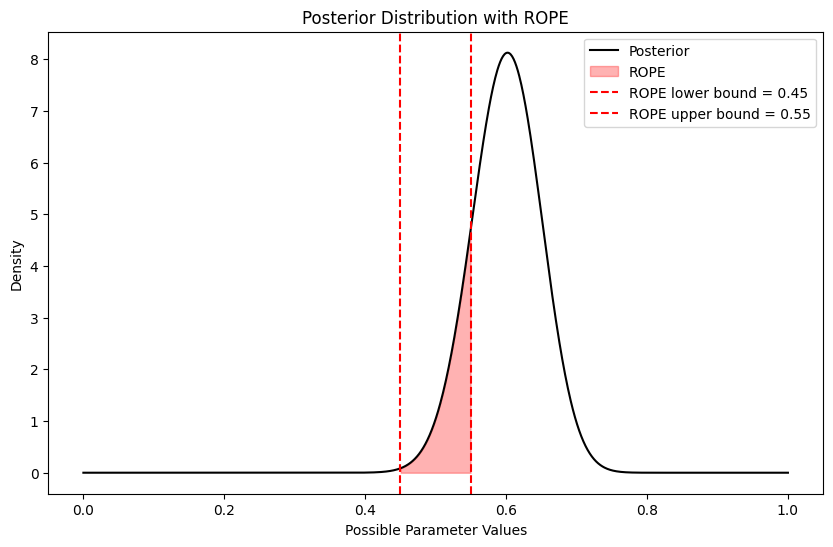

Probability of Direction (pd): 100.00%
Bayes Factor (BF): 7.81
MAP-based p-value: 0.000


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta, norm
import seaborn as sns

# Simulate posterior distribution
alpha, beta_param = 60, 40  # Example Beta distribution params
x = np.linspace(0, 1, 1000)
posterior = beta.pdf(x, alpha, beta_param)

# Define ROPE region
rope_low, rope_high = 0.45, 0.55  # ROPE region for practical equivalence

# Plot Posterior Distribution with ROPE
plt.figure(figsize=(10,6))
plt.plot(x, posterior, label='Posterior', color='black')
plt.fill_between(x, posterior, where=(x >= rope_low) & (x <= rope_high), color='red', alpha=0.3, label='ROPE')
plt.axvline(rope_low, color='red', linestyle='--', label=f'ROPE lower bound = {rope_low}')
plt.axvline(rope_high, color='red', linestyle='--', label=f'ROPE upper bound = {rope_high}')
plt.title("Posterior Distribution with ROPE")
plt.xlabel("Possible Parameter Values")
plt.ylabel("Density")
plt.legend()
plt.show()

# Calculate and plot Probability of Direction (pd)
pd = 1 - beta.cdf(0, alpha, beta_param)
print(f"Probability of Direction (pd): {pd:.2%}")

# Simulate Bayes Factor
def bayes_factor(posterior_values, prior_mean=0.5):
    likelihood_at_prior = beta.pdf(prior_mean, alpha, beta_param)
    likelihood_at_posterior = max(posterior_values)
    return likelihood_at_posterior / likelihood_at_prior

bf = bayes_factor(posterior)
print(f"Bayes Factor (BF): {bf:.2f}")

# MAP-based p-value
map_value = x[np.argmax(posterior)]
p_value = beta.cdf(0, alpha, beta_param) / beta.cdf(map_value, alpha, beta_param)
print(f"MAP-based p-value: {p_value:.3f}")
